In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re
from scipy import stats

In [5]:
train = pd.read_csv("bike-sharing-demand/train.csv",parse_dates=['datetime'])
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


### missingno 패키지
* 바 형태로 데이터가 없는 부분 체크

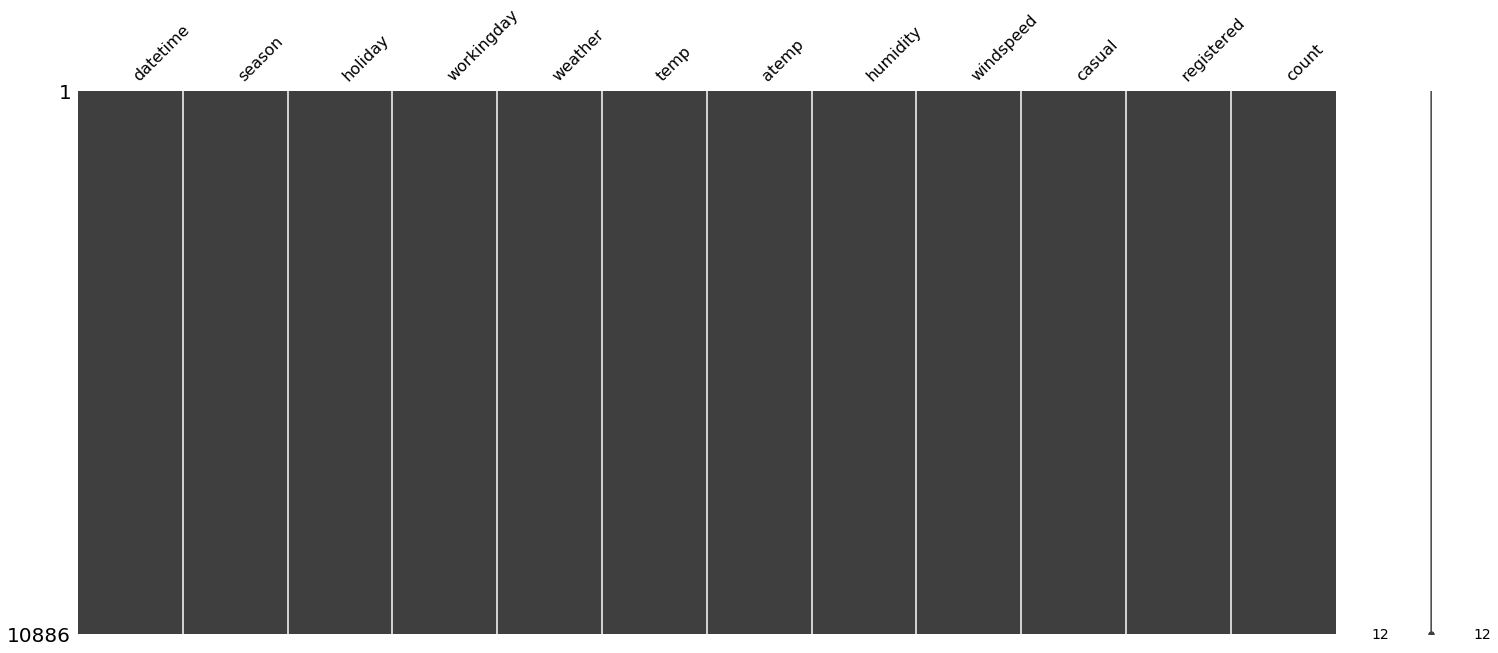

In [8]:
import missingno as msno
msno.matrix(train)

In [11]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 1.0, '초별 대여량')]

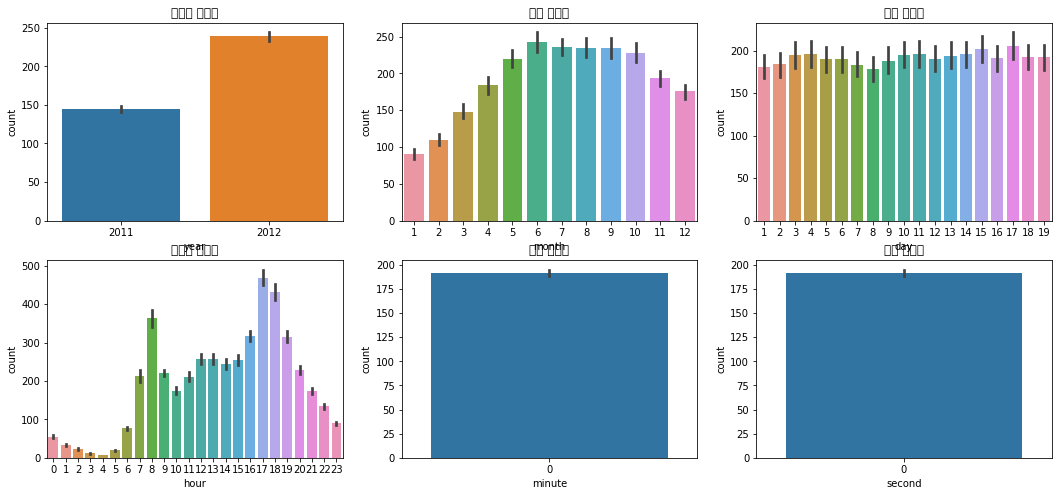

In [43]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
# 년도별 자전거 대여 시각화
sns.barplot(data=train,x='year',y='count',ax=ax1) # ax=ax위치
sns.barplot(data=train,x='month',y='count',ax=ax2)
sns.barplot(data=train,x='day',y='count',ax=ax3)
sns.barplot(data=train,x='hour',y='count',ax=ax4)
sns.barplot(data=train,x='minute',y='count',ax=ax5)
sns.barplot(data=train,x='second',y='count',ax=ax6)

ax1.set(title="연도별 대여량") # ax1에 대한 세팅
ax2.set(title="월별 대여량")
ax3.set(title="일별 대여량")
ax4.set(title="시간별 대여량")
ax5.set(title="분별 대여량")
ax6.set(title="초별 대여량")

In [ ]:
# 계절별 대여량 시각화

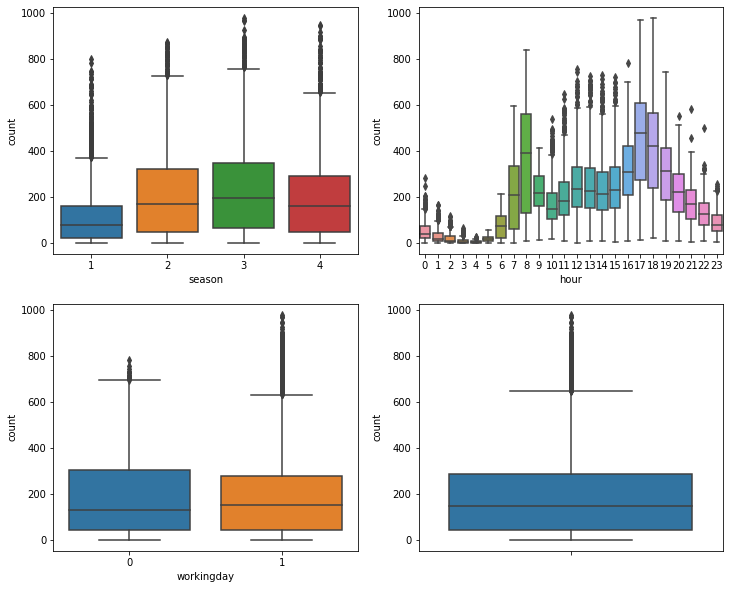

In [30]:
fig,axes = plt.subplots(nrows=2,ncols=2) #axes에 4개의 배열로 들어가게 된다
fig.set_size_inches(12,10)
sns.boxplot(data=train, y='count',x="season",orient="v",ax=axes[0][0])
sns.boxplot(data=train, y='count',x="hour",orient="v",ax=axes[0][1])
sns.boxplot(data=train, y='count',x="workingday",orient="v",ax=axes[1][0])
sns.boxplot(data=train, y='count',orient="v",ax=axes[1][1])

### dayofweek 속성 
0:월요일 1:화요일 ... 6:일요일

In [31]:
train['dayofweek']=train['datetime'].dt.dayofweek
train['dayofweek']

0        5
1        5
2        5
3        5
4        5
5        5
6        5
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       5
15       5
16       5
17       5
18       5
19       5
20       5
21       5
22       5
23       5
24       6
25       6
26       6
27       6
28       6
29       6
        ..
10856    1
10857    1
10858    1
10859    1
10860    1
10861    1
10862    2
10863    2
10864    2
10865    2
10866    2
10867    2
10868    2
10869    2
10870    2
10871    2
10872    2
10873    2
10874    2
10875    2
10876    2
10877    2
10878    2
10879    2
10880    2
10881    2
10882    2
10883    2
10884    2
10885    2
Name: dayofweek, Length: 10886, dtype: int64

### 시간별 대여량 시각화

ValueError: Invalid RGBA argument: masked

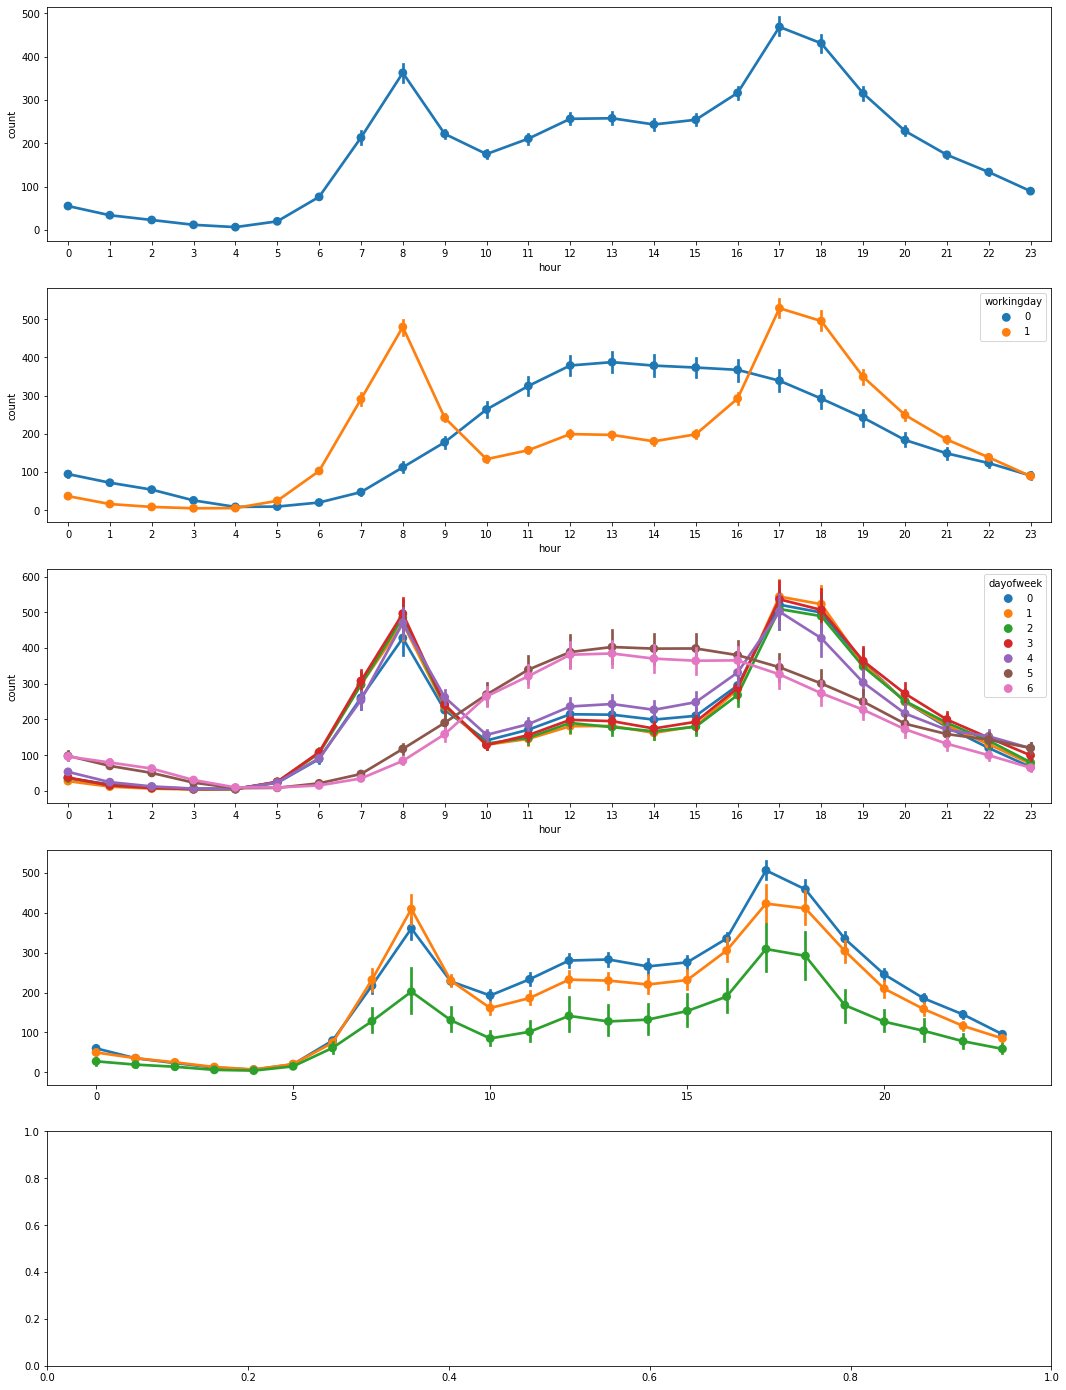

In [158]:
#시간의 흐름에 따른 그래프(0~23)
#근무일의 여부에 따른 그래프(0,1)
#요일에 따른 그래프(0~6)
#계절에 따른 그래프(1~4)
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5) #axes에 4개의 배열로 들어가게 된다
fig.set_size_inches(18,25)
sns.pointplot(data=train, x="hour", y="count", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

### 상관계수 구하기

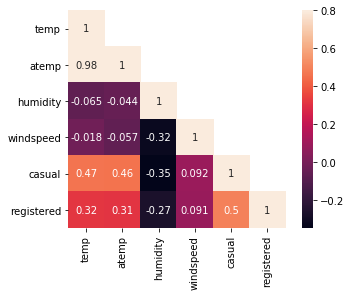

In [59]:
train.columns
corrMatt = train[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered']]
corrMatt = corrMatt.corr() # 상관계수를 구함 

mask = np.array(corrMatt)
mask
mask[np.tril_indices_from(mask)]=False # 히트맵에서 한쪽만 출력되도록 mask값을 만들어주는 구문!!
# sns.heatmap(corrMatt,square=True,annot=True)
sns.heatmap(corrMatt,mask=mask,square=True,annot=True, vmax=.8) # vmax는 범례 크기 

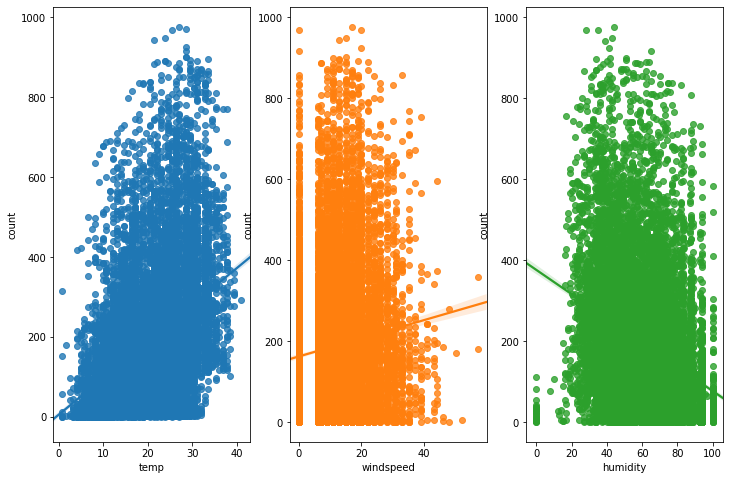

In [64]:
fig,axes = plt.subplots(ncols=3) #axes에 4개의 배열로 들어가게 된다
fig.set_size_inches(12,8)
sns.regplot(x='temp',y='count',data=train,ax=axes[0])
sns.regplot(x='windspeed',y='count',data=train,ax=axes[1])
sns.regplot(x='humidity',y='count',data=train,ax=axes[2])

### '년-월' 만 묶은 컬럼 만드는 함수

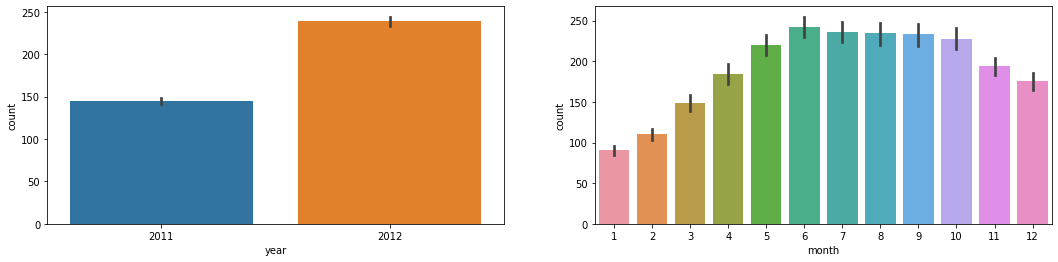

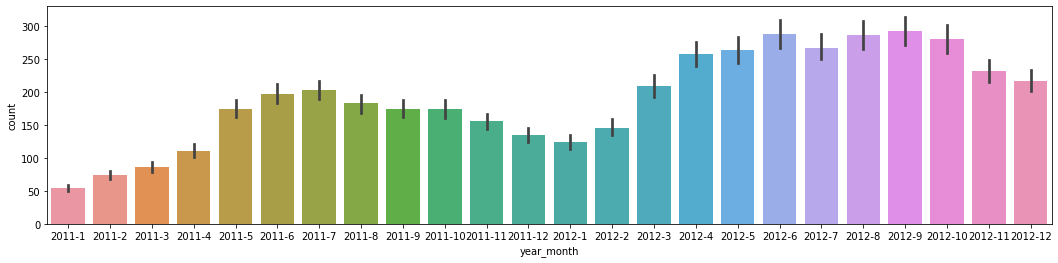

In [70]:
def cym(dtime):
    return "{0}-{1}".format(dtime.year,dtime.month)

train['year_month']=train['datetime'].apply(cym)
train['year_month']

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(18,4)
sns.bar plot(data=train,x='year',y='count',ax=ax1)
sns.barplot(data=train,x='month',y='count',ax=ax2)

fig,ax3 = plt.subplots()
fig.set_size_inches(18,4)
sns.barplot(data=train,x='year_month',y='count',ax=ax3)

In [ ]:
### outlier 표시

In [72]:
np.abs(train['count']-train['count'].mean()) # 평균 뺀 값을 절댓값 씌워줌

0        175.574132
1        151.574132
2        159.574132
3        178.574132
4        190.574132
5        190.574132
6        189.574132
7        188.574132
8        183.574132
9        177.574132
10       155.574132
11       135.574132
12       107.574132
13        97.574132
14        85.574132
15        81.574132
16        98.574132
17       124.574132
18       156.574132
19       154.574132
20       155.574132
21       157.574132
22       163.574132
23       152.574132
24       174.574132
25       174.574132
26       182.574132
27       185.574132
28       188.574132
29       189.574132
            ...    
10856    333.425868
10857    161.425868
10858     76.425868
10859     23.574132
10860     59.574132
10861    110.574132
10862    150.574132
10863    176.574132
10864    188.574132
10865    186.574132
10866    184.574132
10867    160.574132
10868     79.574132
10869    171.425868
10870    486.425868
10871    125.425868
10872     27.574132
10873      8.425868
10874     44.425868


In [140]:
# 현재 카운트 값이 표준편차의 3배를 넘어가지 않는다면
trainWithoutOutliers=train[np.abs(train['count']-train['count'].mean()) <= 3*train['count'].std()] #181*3
trainWithoutOutliers.shape
train.shape

(10886, 20)

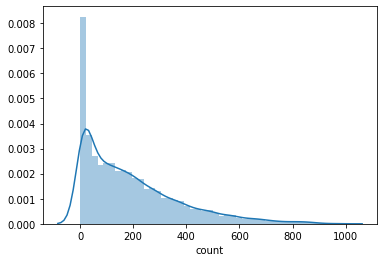

In [141]:
sns.distplot(train['count'])

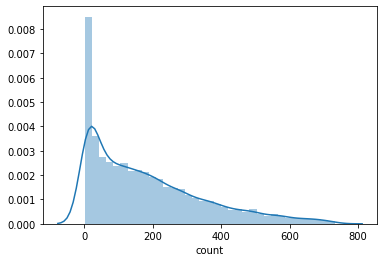

In [142]:
sns.distplot(trainWithoutOutliers['count'])

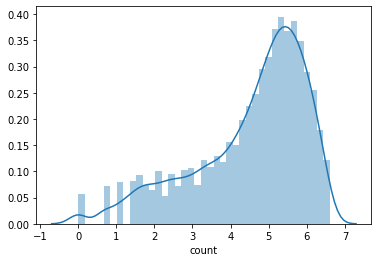

In [143]:
sns.distplot(np.log(trainWithoutOutliers['count']))

### 랜덤포레스트 기반 예측

In [145]:
train = pd.read_csv("bike-sharing-demand/train.csv",parse_dates=['datetime'])
train.shape

(10886, 12)

In [146]:
test = pd.read_csv("bike-sharing-demand/test.csv",parse_dates=['datetime'])
test.shape

(6493, 9)

In [147]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape


(10886, 19)

In [148]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

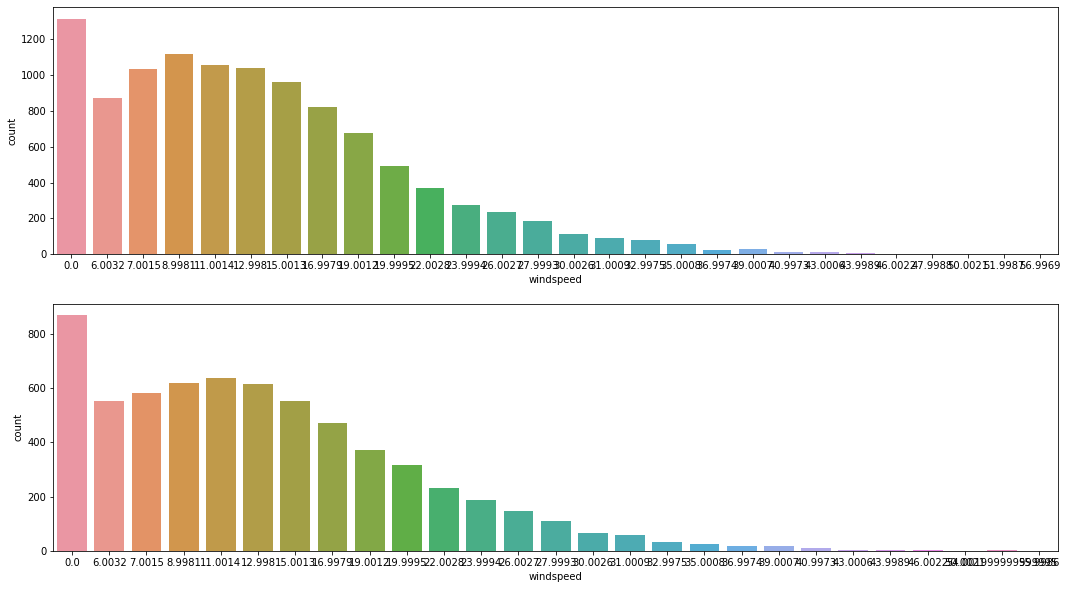

In [133]:
fig,axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)
sns.countplot(data=train, ax=axes[0], x="windspeed") # 풍속 값이 0인게 너무 많다 --> 전처리 필요함
sns.countplot(data=test, ax=axes[1], x="windspeed")

In [149]:
# 풍속이 0인 값을 일괄적으로 평균으로 대체 ** 구문 잘 외워둘것!!
# train['windspeed']==0
# train.loc[train['windspeed']==0, 'windspeed']=train['windspeed'].mean()
#test.loc[test["windspeed"]==0,"windspeed"] = test["windspeed"].mean()

# 풍속이 0인것과 0이 아닌것을 각각 저장
trainWind0 = train.loc[train['windspeed']==0]
trainWindNot0 = train.loc[train['windspeed']!=0]

print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


### 풍속을 예측하여 결측값 처리 

In [150]:
from sklearn.ensemble import RandomForestClassifier # 이분법적인 결과가 나온다

In [151]:
def predict_windspeed(data): # 데이터를 전달받아서, 풍속-인것과 아닌 것으로 따로 저장
    dataWind0 = data.loc[data['windspeed']==0]
    dataWindNot0 = data.loc[data['windspeed']!=0]
    wCol=['season','weather', 'temp',
       'atemp', 'humidity','year', 'month']
    
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype(str) # str로 변경하여 풍속이 0이 아닌 것을 저장
    
    rfModel_wind=RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])
    # 풍속이 0이 아닌 값으로 모델 생성하고,
    # 풍속이 0인 값들을 예측
    
    wid0Values = rfModel_wind.predict(X=dataWind0[wCol]) # X는 예측 때, 입력받는 데이터이다  --> 예측하여 wid0Values에 저장
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = wid0Values # 예측값을 넣어본다
    data = predictWindNot0.append(predictWind0)
    data['windspeed']=data['windspeed'].astype('float')
    data.reset_index(inplace=True)
    return data


In [152]:
train=predict_windspeed(train)
#test=predict_windspeed(test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [153]:
train.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
1,10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
2,11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
3,12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
4,13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [154]:
print(train.shape)
train.info()
#train['count']
#print("="*50)
#print(test)

(10886, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [155]:
print(np.min(train['count'])) #1
print(np.max(train['count'])) #977
train.info()

1
977
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [ ]:
#x축은 풍속, y축은 count 트레인데이터 시각화
fig,ax1=plt.subplots()
fig.set_size_inches(18,6)
sns.countplot(data=train, x="windspeed", ax=ax1)

In [ ]:
#피처 선택
#신호와 잡음 구분
#피처가 무조건 많다고 해서 좋은 성능이 보장되지는 않음
#피처를 하나씩 추가하면서(변경), 성능이 좋지 않은 피처는 제거

cfn=['season', 'holiday', 'workingday', 'weather',
    'dayofweek', 'year', 'month', 'hour']
train.info()
for var in cfn:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')

In [ ]:
#def rmsle(pv, av):

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
model = RandomForestClassifier(random_state=42,n_jobs=-1, n_estimators=100)
model

# 예측
# 예측결과(count) = model.predict(테스트 데이터의 x)
# submission['counts']=예측결과(count)

#제출 -> 등수 확인

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)